# Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns



# Read CSV

In [27]:
df_dailyweather = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Daily_Weather.csv')


# SneakPeak Data

## .head()

In [28]:
print('df_dailyweather')
print(df_dailyweather.head())


df_dailyweather
   Casual        Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371  2021-01-01     590          961                            -0.9   
1    2874  2021-01-02    2844         5718                             4.8   
2     495  2021-01-03    1133         1628                             0.9   
3     907  2021-01-04    2074         2981                             1.0   
4    1057  2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  
0                       2.3                      63                      10.6  
1                       7.6                      61                      19.1  
2                       3.9                      63                      13.0  
3                       4.1                       3                      13.3  
4                       4.0                      51                       9.2  


## .columns

In [29]:
print('df_dailyweather')
print(df_dailyweather.columns)


df_dailyweather
Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')


# ----------------------------------------------

# Daily Weather 

## Cleaning

### Check for Null

In [30]:
df_dailyweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


### Check for Null again

In [31]:
df_dailyweather.isnull().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

### Check for Duplicated

In [32]:
df_dailyweather.duplicated().sum()

np.int64(0)

### Turn to lowercase and no spaces

In [33]:
df_dailyweather.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [34]:
df_dailyweather = df_dailyweather.rename(str.lower, axis=1)
df_dailyweather = df_dailyweather.rename(columns={'apparent_temperature_mean (°c)':'apparent_temperature_mean_(°c)','temperature_2m_mean (°c)':'temperature_2m_mean_(°c)', 'weathercode (wmo code)':'weathercode_(wmo code)', 'windspeed_10m_max (km/h)':'windspeed_10m_max_(km/h)' })
df_dailyweather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_(°c)', 'temperature_2m_mean_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m_max_(km/h)'],
      dtype='object')

### Datetime

In [35]:
df_dailyweather['date'] = pd.to_datetime(df_dailyweather['date'])
df_dailyweather['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


In [72]:
df_dailyweather['weathercode_(wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65])

### Turning Data into Categorical Values

In [36]:
df_dailyweather.head()

,casual,date,member,total_rides,apparent_temperature_mean_(°c),temperature_2m_mean_(°c),weathercode_(wmo code),windspeed_10m_max_(km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [37]:
df_dailyweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   casual                          1095 non-null   int64         
 1   date                            1095 non-null   datetime64[ns]
 2   member                          1095 non-null   int64         
 3   total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean_(°c)  1095 non-null   float64       
 5   temperature_2m_mean_(°c)        1095 non-null   float64       
 6   weathercode_(wmo code)          1095 non-null   int64         
 7   windspeed_10m_max_(km/h)        1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 68.6 KB


In [38]:

# df_dailyweather['casual'] = df_dailyweather['casual'].astype('category')
# df_dailyweather['member'] = df_dailyweather['member'].astype('category')
# df_dailyweather.info()

## Research Domain Knowledge

### What is Washingtone like?

### What is the role of the e-bikes here?

### What is the current situation of bike rental companies?

### Why do people need ot use bike share?

### How many years ago did this was invented?


## EDA

### Visualize

#### Casual vs Member by month[year]

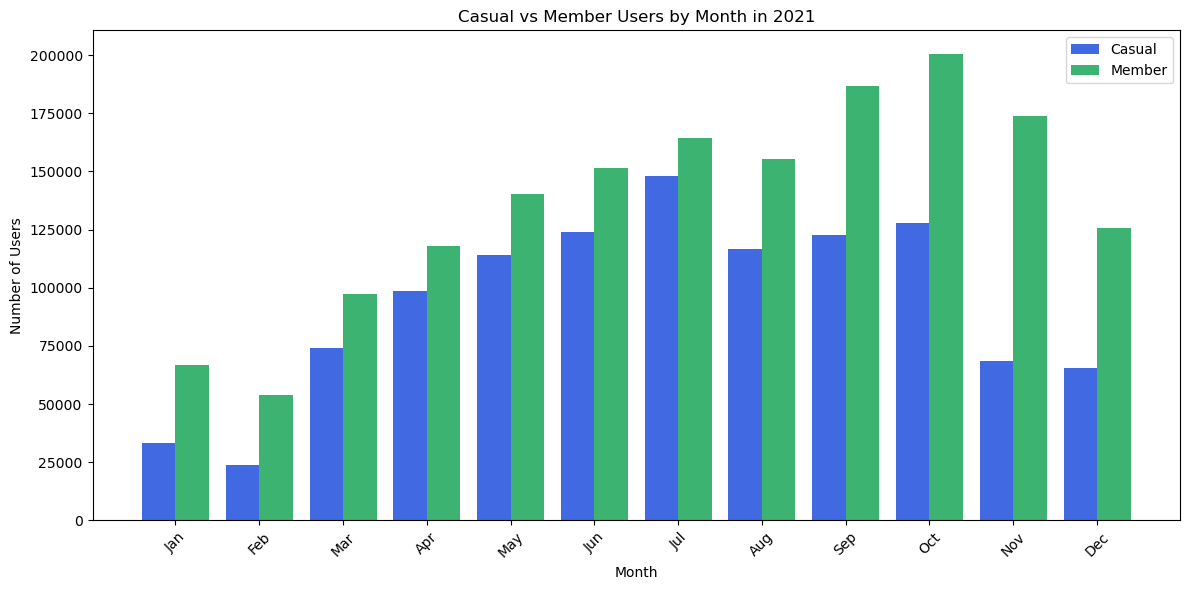

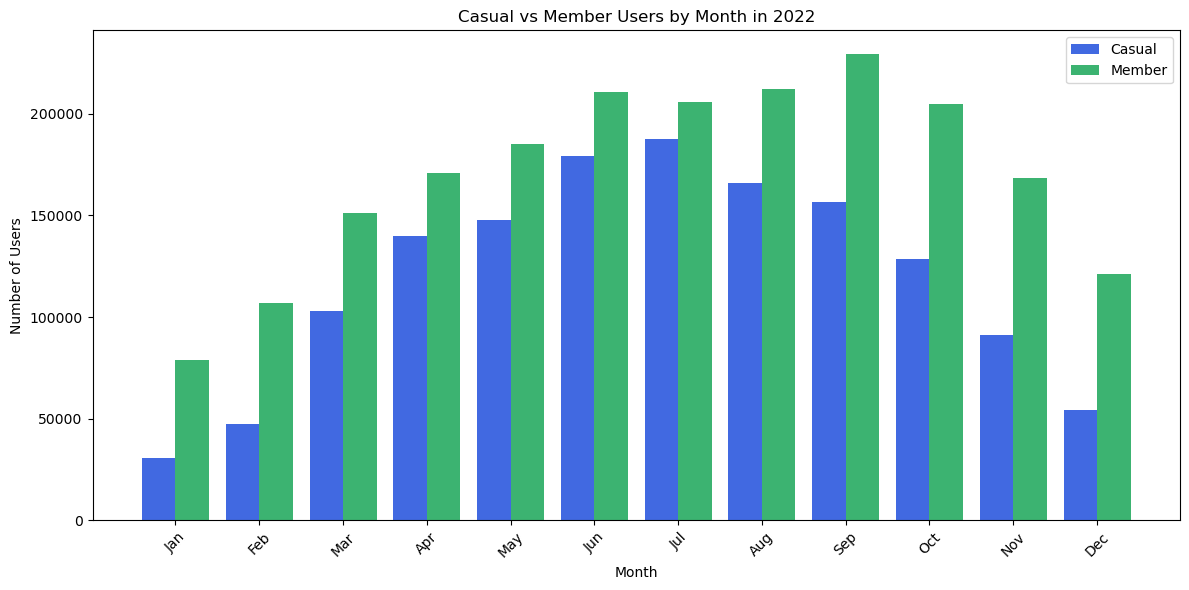

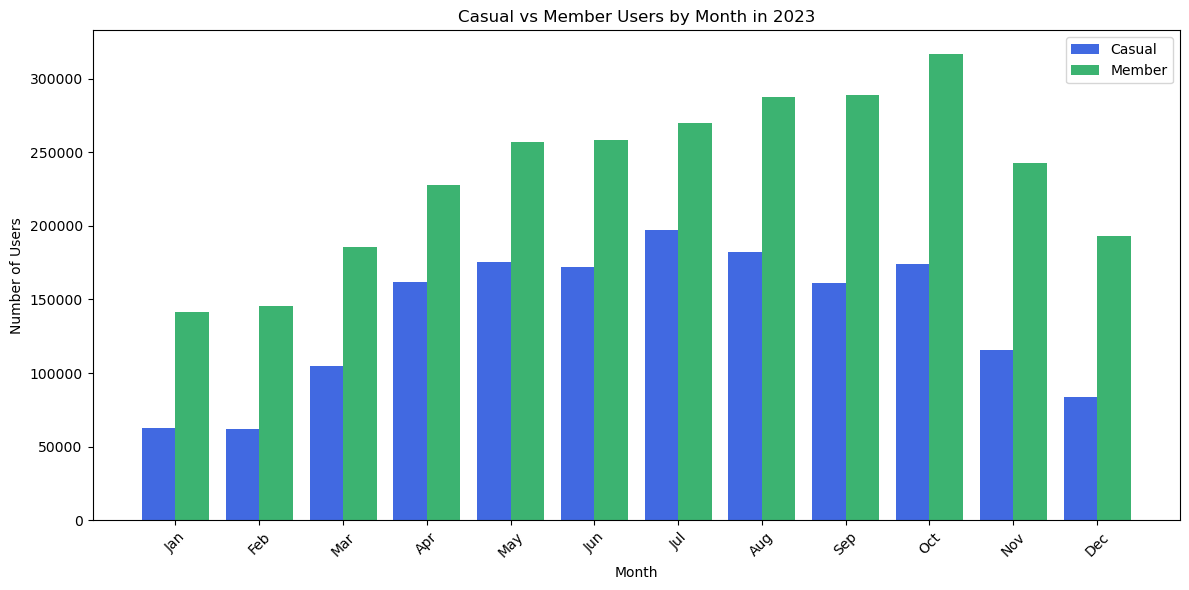

In [ ]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_dailyweather['year'] = df_dailyweather['date'].dt.year
df_dailyweather['month'] = df_dailyweather['date'].dt.month

casual_by_month = df_dailyweather.groupby('month')['casual'].sum()
member_by_month = df_dailyweather.groupby('month')['member'].sum()
months = casual_by_month.index.astype(str)


monthly_users = df_dailyweather.groupby(['year', 'month'])[['casual', 'member']].sum().reset_index()

for year in monthly_users['year'].unique():
    yearly_data = monthly_users[monthly_users['year'] == year]
    months = yearly_data['month']
    x = np.arange(len(months))
    width = 0.4

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, yearly_data['casual'], width=width, label='Casual', color='royalblue')
    plt.bar(x + width/2, yearly_data['member'], width=width, label='Member', color='mediumseagreen')

    plt.xticks(x, [month_names[m-1] for m in months], rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Number of Users')
    plt.title(f'Casual vs Member Users by Month in {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Count rides by Weather code (Casual vs Member)

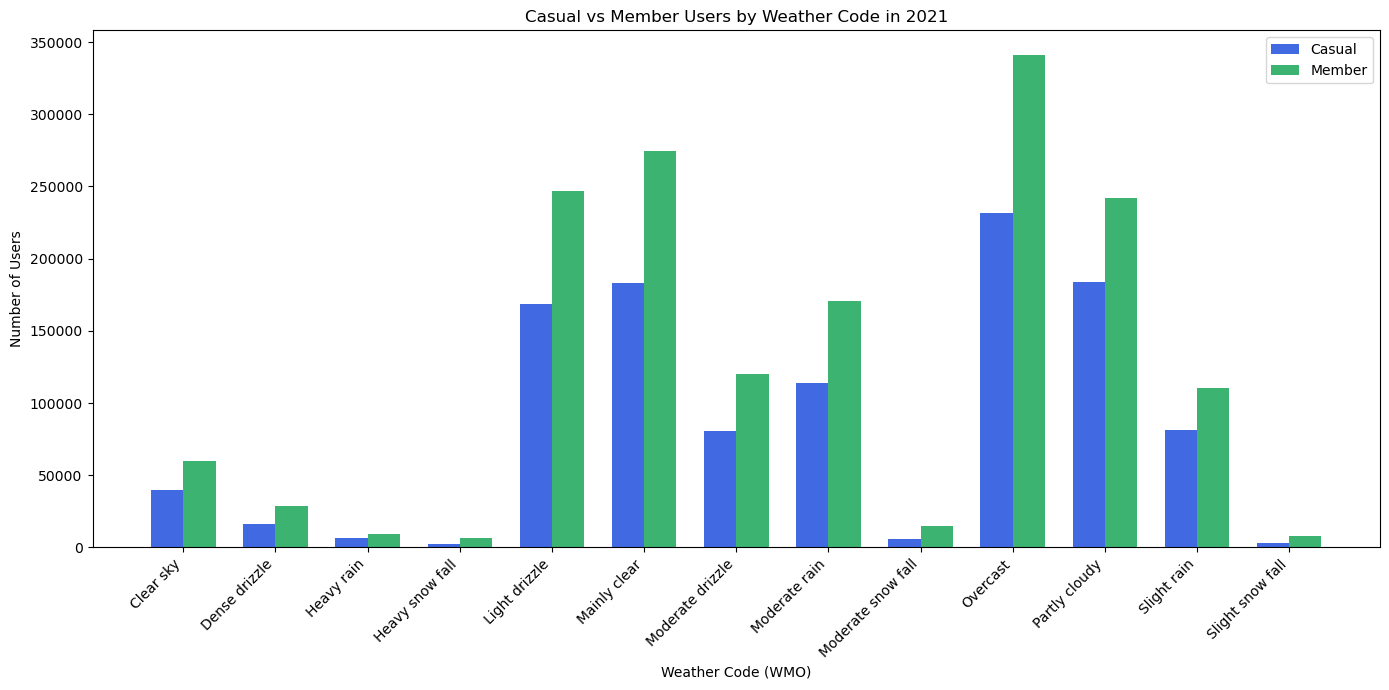

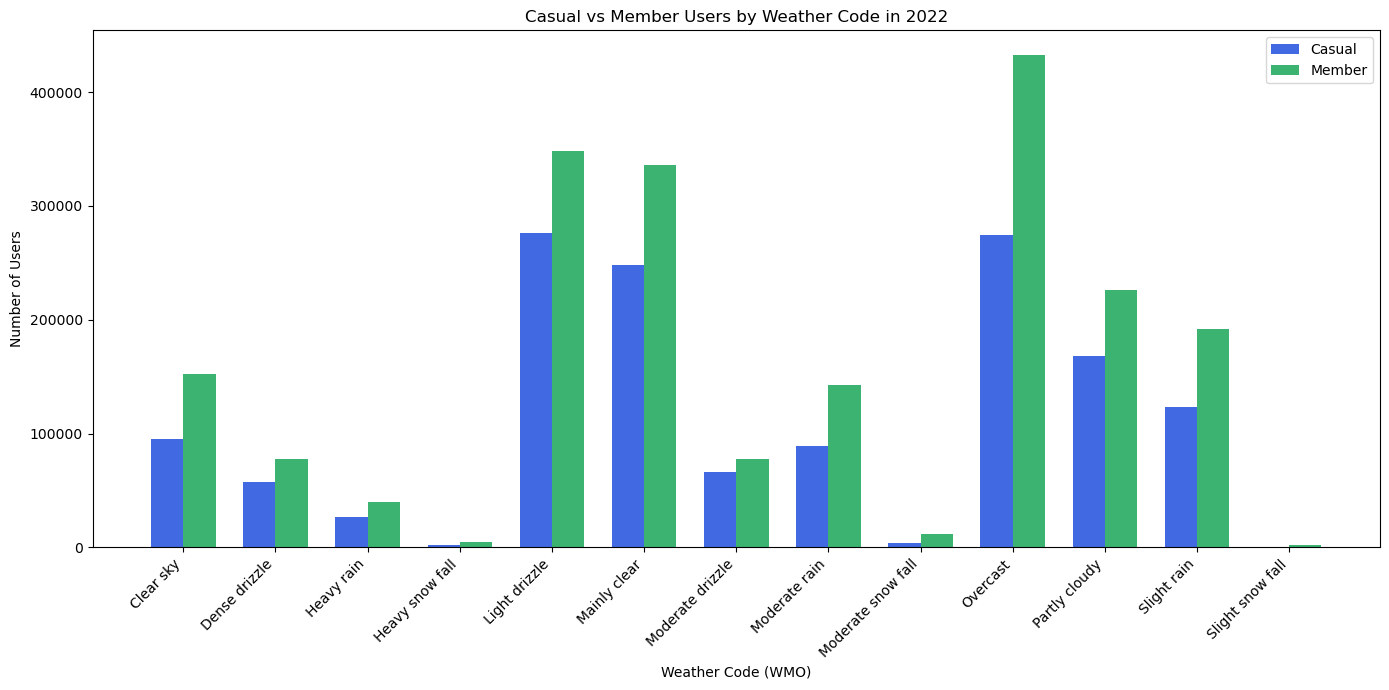

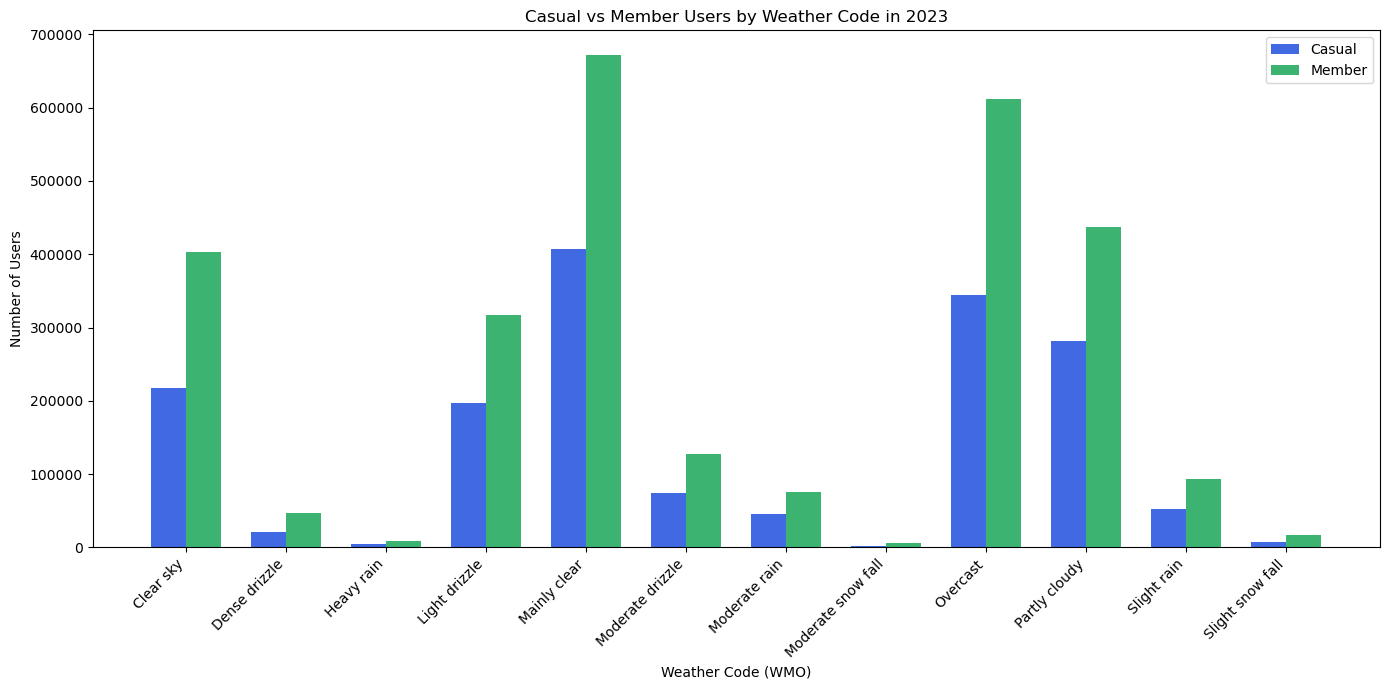

In [82]:
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Deposits of rime fog',
    51: 'Light drizzle',
    53: 'Moderate drizzle',
    55: 'Dense drizzle',
    56: 'Light freezing drizzle',
    57: 'Dense freezing drizzle',
    61: 'Slight rain',
    63: 'Moderate rain',
    65: 'Heavy rain',
    66: 'Light freezing rain',
    67: 'Heavy freezing rain',
    71: 'Slight snow fall',
    73: 'Moderate snow fall',
    75: 'Heavy snow fall',
    77: 'Snow grains',
    80: 'Slight rain showers',
    81: 'Moderate rain showers',
    82: 'Violent rain showers',
    85: 'Slight snow showers',
    86: 'Heavy snow showers',
    95: 'Thunderstorm',
    96: 'Thunderstorm with slight hail',
    99: 'Thunderstorm with heavy hail'
}

df_dailyweather['year'] = df_dailyweather['date'].dt.year
df_dailyweather['month'] = df_dailyweather['date'].dt.month

df_dailyweather['weather_desc'] = df_dailyweather['weathercode_(wmo code)'].map(weather_code_map)

weather_users = df_dailyweather.groupby('weather_desc')[['casual', 'member']].sum().reset_index()

monthly_users = df_dailyweather.groupby(['weathercode_(wmo code)','year', 'month'])[['casual', 'member']].sum().reset_index()

for year in df_dailyweather['year'].unique():
    data_year = df_dailyweather[df_dailyweather['year'] == year].copy()
    data_year['weather_desc'] = data_year['weathercode_(wmo code)'].map(weather_code_map)
    weather_users = data_year.groupby('weather_desc')[['casual', 'member']].sum().reset_index()


    x = np.arange(len(weather_users))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar(x - width/2, weather_users['casual'], width=width, label='Casual', color='royalblue')
    plt.bar(x + width/2, weather_users['member'], width=width, label='Member', color='mediumseagreen')

    plt.xticks(x, weather_users['weather_desc'], rotation=45, ha='right')
    plt.xlabel('Weather Code (WMO)')
    plt.ylabel('Number of Users')
    plt.title(f'Casual vs Member Users by Weather Code in {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()


#### Day of the week count per year

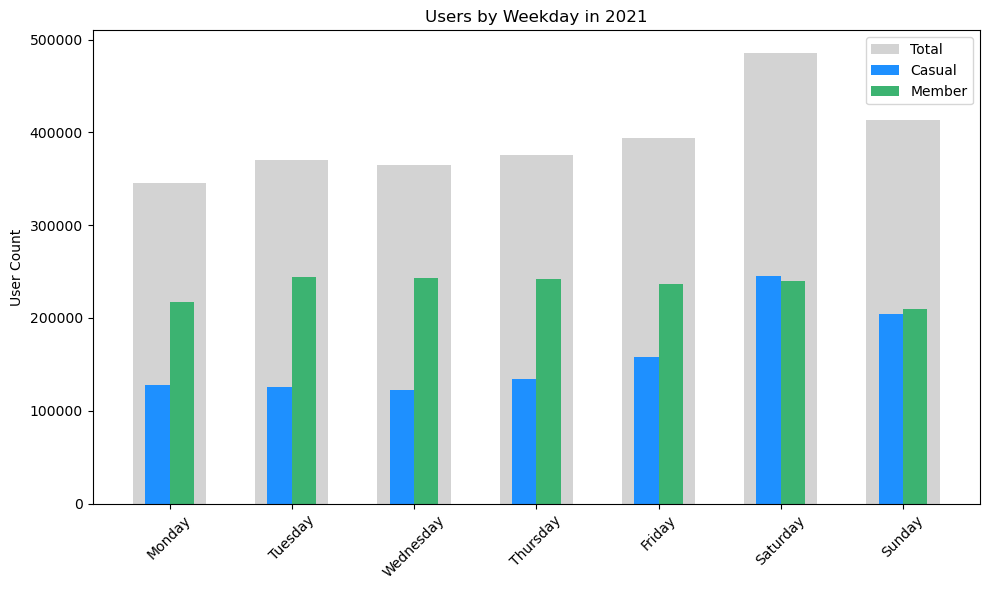

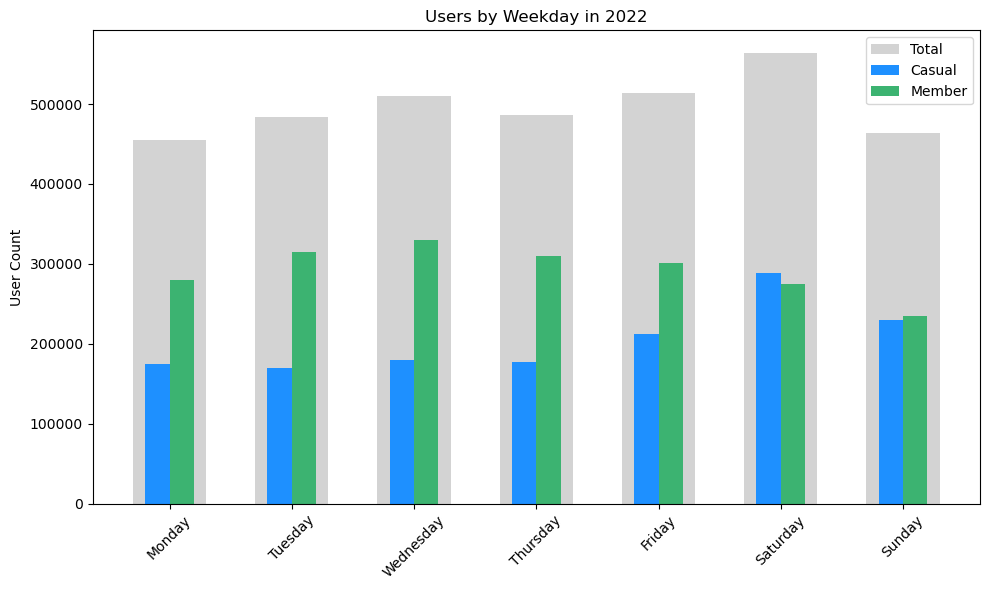

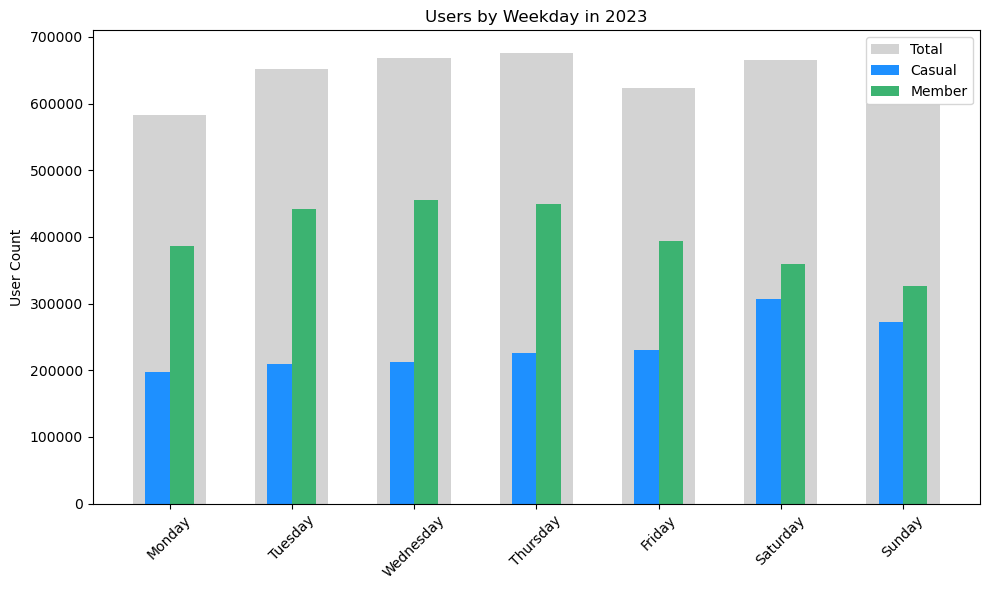

In [87]:
df_dailyweather['day_name'] = df_dailyweather['date'].dt.day_name()
df_dailyweather['total_users'] = df_dailyweather['casual'] + df_dailyweather['member']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for year in df_dailyweather['year'].unique():
    data_year = df_dailyweather[df_dailyweather['year'] == year]

    summary = data_year.groupby('day_name')[['casual', 'member', 'total_users']].sum().reindex(weekday_order)

    x = np.arange(len(weekday_order))
    width = 0.6  # full length bar for the back. 
    inner_width = 0.2  # inner bars. 

    fig, ax = plt.subplots(figsize=(10, 6))

    # Total users bar, at the back
    ax.bar(x, summary['total_users'], width=width, color='lightgrey', label='Total')

    # Casual users bar infront. 
    ax.bar(x - inner_width/2, summary['casual'], width=inner_width, color='dodgerblue', label='Casual')

    # Member users bar infront. 
    ax.bar(x + inner_width/2, summary['member'], width=inner_width, color='mediumseagreen', label='Member')
        
    ax.set_xticks(x)
    ax.set_xticklabels(weekday_order, rotation=45)
    ax.set_ylabel('User Count')
    ax.set_title(f'Users by Weekday in {year}')
    ax.legend()
    plt.tight_layout()
    plt.show()
